## The Mental Health Diagnosis and Treatment Monitoring Dataset
The dataset contains information on 500 individuals, focusing on mental health diagnoses, treatment plans, and outcomes. Key features include patient demographics such as age and gender, as well as specific mental health conditions (e.g., anxiety, depression, etc.). The dataset also captures symptom severity, mood scores, sleep quality, and stress levels, all rated on a scale of 1 to 10, providing insight into the patient's mental and physical well-being. Additionally, it includes details on treatment plans, including prescribed medications (e.g., SSRIs, antidepressants, etc.), therapy types (e.g., CBT, DBT, etc.), and treatment duration. Progress tracking is also incorporated, with ratings for treatment progress and AI-detected emotional state, alongside adherence to the treatment plan. The 'outcome' attribute, which indicates whether the treatment was improved, deteriorated, or unaffected, serves as the target variable for the analysis, while the remaining attributes can be used to explore and model the factors affecting mental health treatment outcomes.

In [78]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from  sklearn.metrics import classification_report

In [50]:
df = pd.read_csv('data/mental_health_diagnosis_treatment_data.csv')
df

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43.0,Female,Major Depressive Disorder,10,5,8,NaN,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,NaN,Deteriorated,7,Anxious,66
1,2,40.0,Female,Major Depressive Disorder,9,5,4,7.0,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7.0,No Change,7,Neutral,78
2,3,55.0,Female,Major Depressive Disorder,6,3,4,NaN,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,NaN,Deteriorated,5,Happy,62
3,4,34.0,Female,Major Depressive Disorder,6,3,6,5.0,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8.0,Deteriorated,10,Excited,72
4,5,52.0,Male,Panic Disorder,7,6,6,8.0,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5.0,Deteriorated,6,Excited,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,NaN,Male,Generalized Anxiety,10,4,8,NaN,Mood Stabilizers,Dialectical Behavioral Therapy,2024-04-09,8,NaN,Improved,10,Depressed,73
496,497,22.0,Male,Panic Disorder,5,6,6,7.0,Benzodiazepines,Mindfulness-Based Therapy,2024-02-05,13,6.0,Deteriorated,8,Happy,86
497,498,23.0,Male,Major Depressive Disorder,7,3,4,NaN,Antidepressants,Cognitive Behavioral Therapy,2024-03-24,10,NaN,Deteriorated,5,Neutral,87
498,499,48.0,Male,Bipolar Disorder,9,4,6,9.0,Antidepressants,Mindfulness-Based Therapy,2024-03-22,10,6.0,Improved,7,Anxious,73


In [51]:
df = df.drop(columns=['Patient ID','Treatment Start Date'],axis=1) #ovie atributi nemaat nikakvo vlijanie vo predviduvanjeto na outcome atributot 

In [52]:
df.isnull().sum()

Age                              25
Gender                            0
Diagnosis                         0
Symptom Severity (1-10)           0
Mood Score (1-10)                 0
Sleep Quality (1-10)              0
Physical Activity (hrs/week)     50
Medication                        0
Therapy Type                      0
Treatment Duration (weeks)        0
Stress Level (1-10)             100
Outcome                           0
Treatment Progress (1-10)         0
AI-Detected Emotional State       0
Adherence to Treatment (%)        0
dtype: int64

In [53]:
df.describe()

,Age,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),Adherence to Treatment (%)
count,475.000000,500.000000,500.000000,500.000000,450.000000,500.000000,400.00000,500.000000,500.00000
mean,38.623158,7.478000,5.482000,6.472000,5.275556,12.110000,7.56750,7.436000,75.45400
std,12.649406,1.706265,1.707486,1.668167,2.846414,2.440864,1.70226,1.725067,9.08697
min,18.000000,5.000000,3.000000,4.000000,1.000000,8.000000,5.00000,5.000000,60.00000
25%,28.000000,6.000000,4.000000,5.000000,3.000000,10.000000,6.00000,6.000000,67.00000
50%,38.000000,8.000000,5.000000,6.000000,5.000000,12.000000,8.00000,7.000000,76.00000
75%,50.000000,9.000000,7.000000,8.000000,8.000000,14.000000,9.00000,9.000000,84.00000
max,60.000000,10.000000,8.000000,9.000000,10.000000,16.000000,10.00000,10.000000,90.00000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           475 non-null    float64
 1   Gender                        500 non-null    object 
 2   Diagnosis                     500 non-null    object 
 3   Symptom Severity (1-10)       500 non-null    int64  
 4   Mood Score (1-10)             500 non-null    int64  
 5   Sleep Quality (1-10)          500 non-null    int64  
 6   Physical Activity (hrs/week)  450 non-null    float64
 7   Medication                    500 non-null    object 
 8   Therapy Type                  500 non-null    object 
 9   Treatment Duration (weeks)    500 non-null    int64  
 10  Stress Level (1-10)           400 non-null    float64
 11  Outcome                       500 non-null    object 
 12  Treatment Progress (1-10)     500 non-null    int64  
 13  AI-De

<Axes: xlabel='Outcome'>

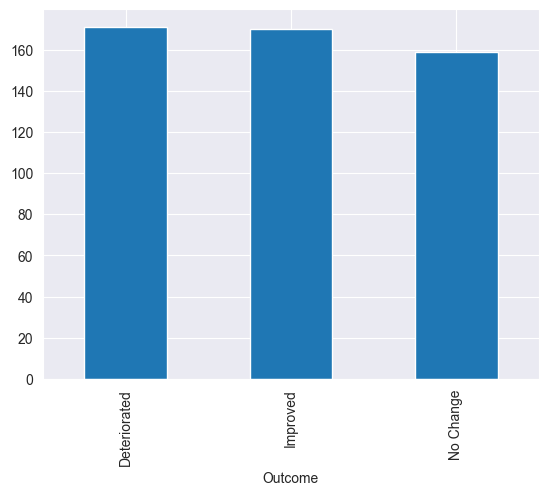

In [55]:
df['Outcome'].value_counts().plot.bar()

## Data preparation and Visualisation

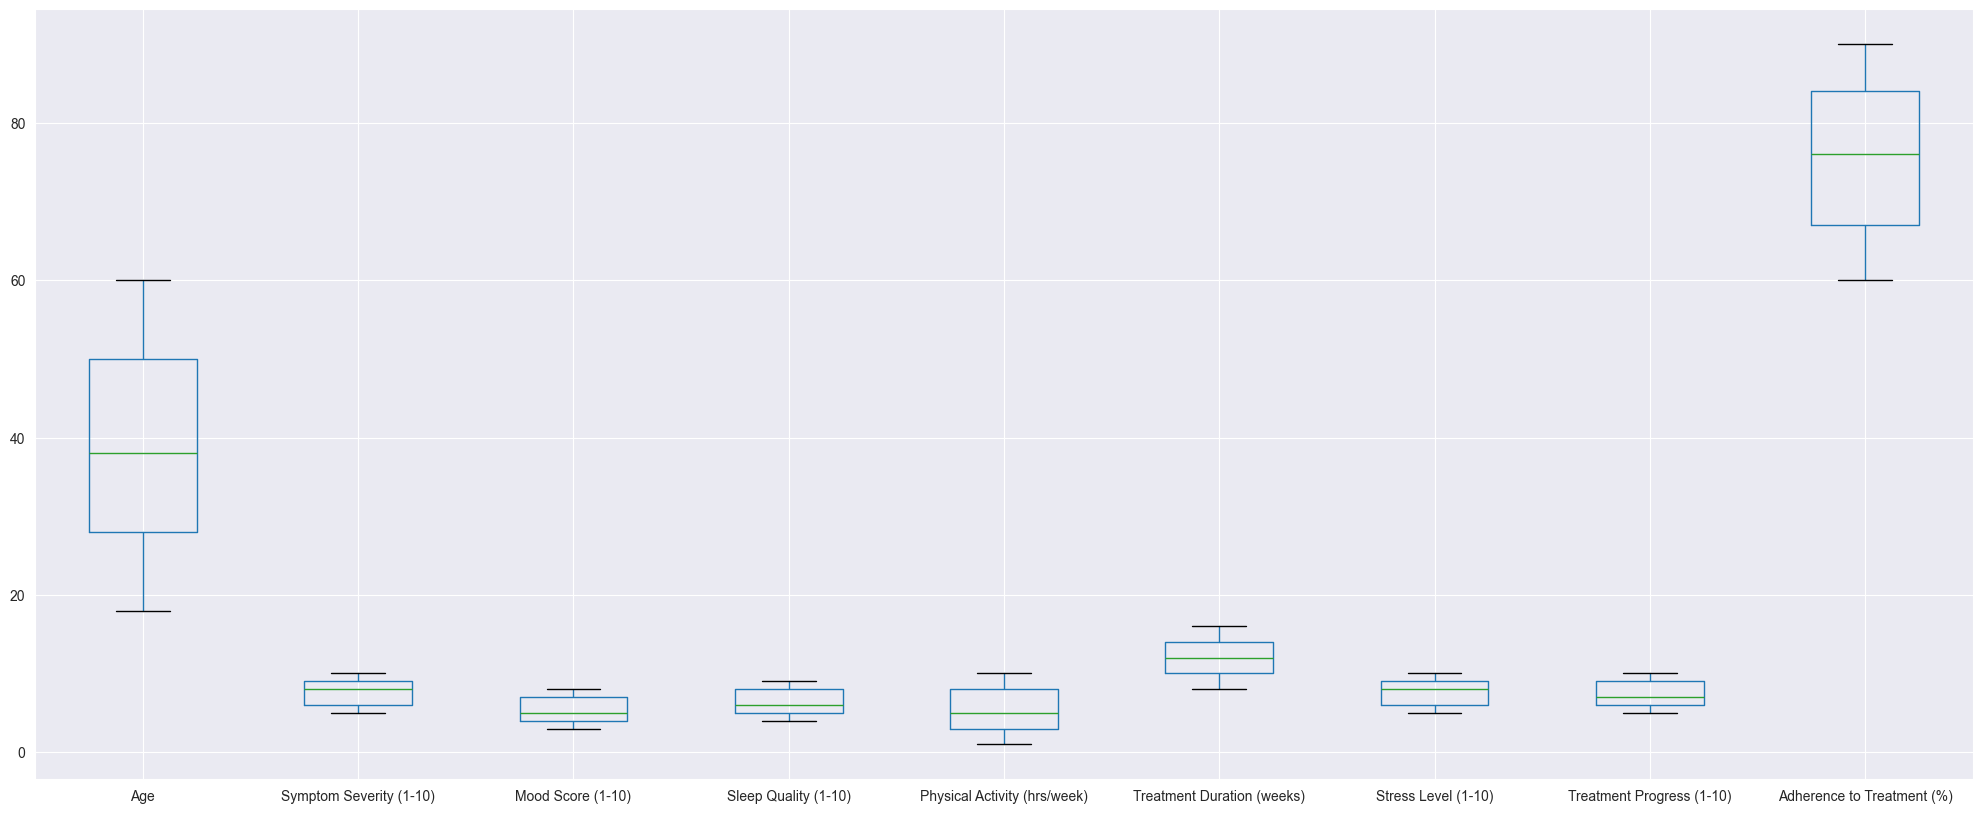

In [56]:
plt.figure(figsize=(25,10))
df.boxplot()
plt.show()

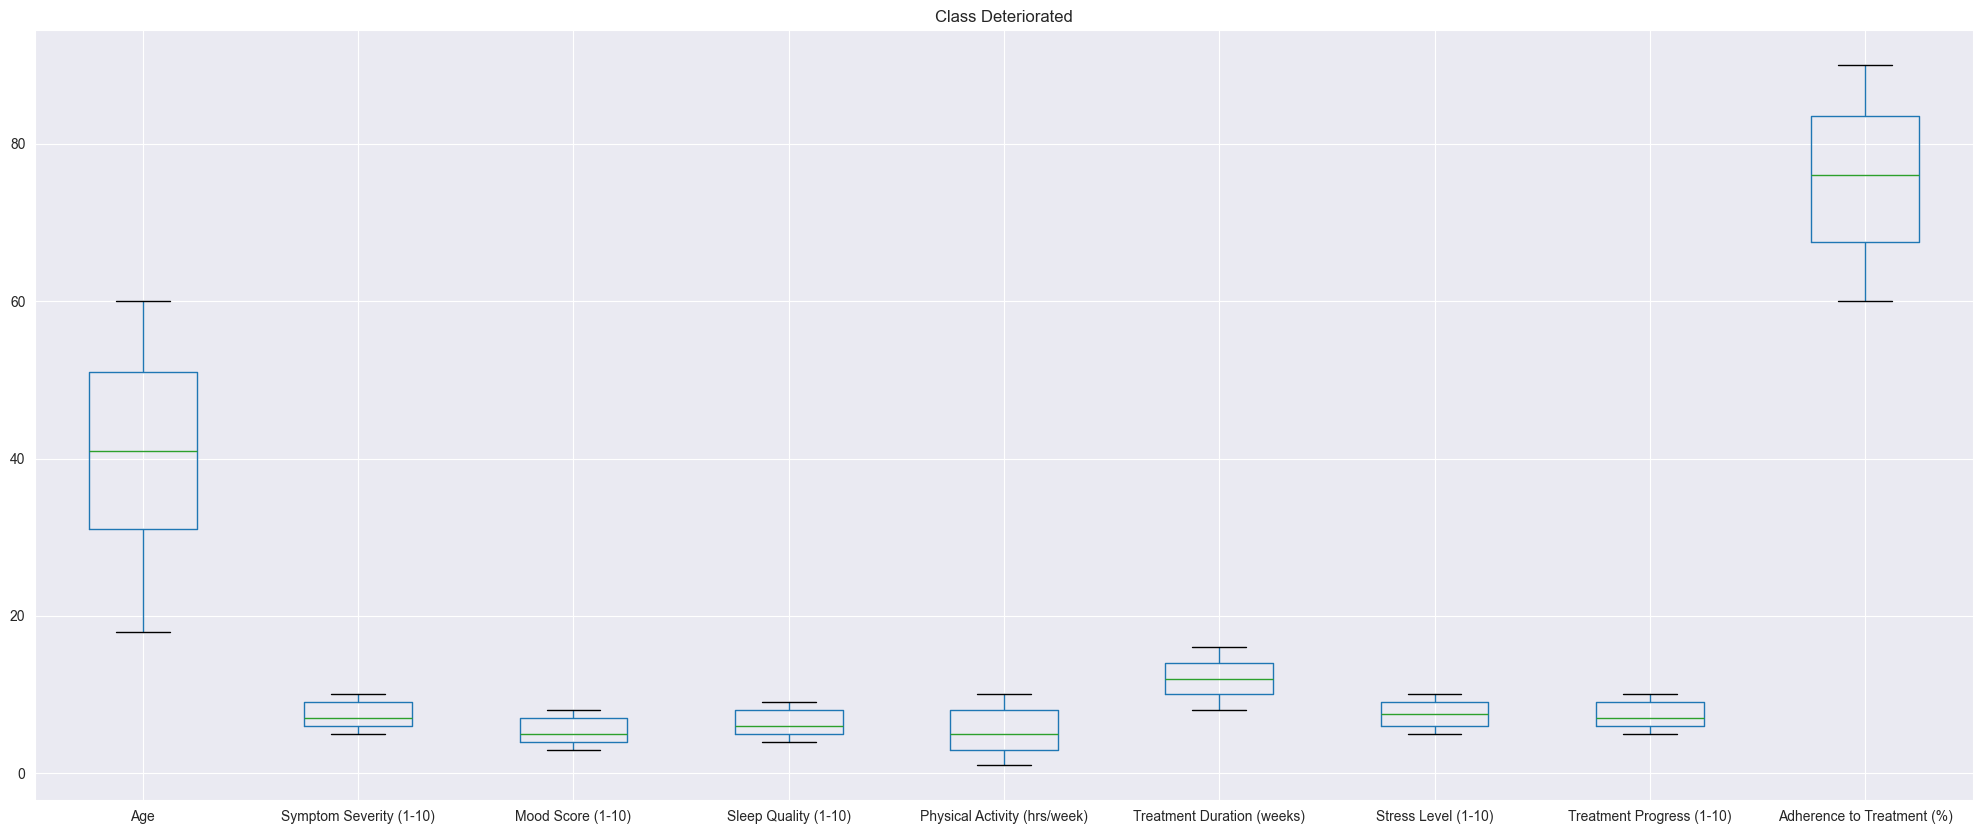

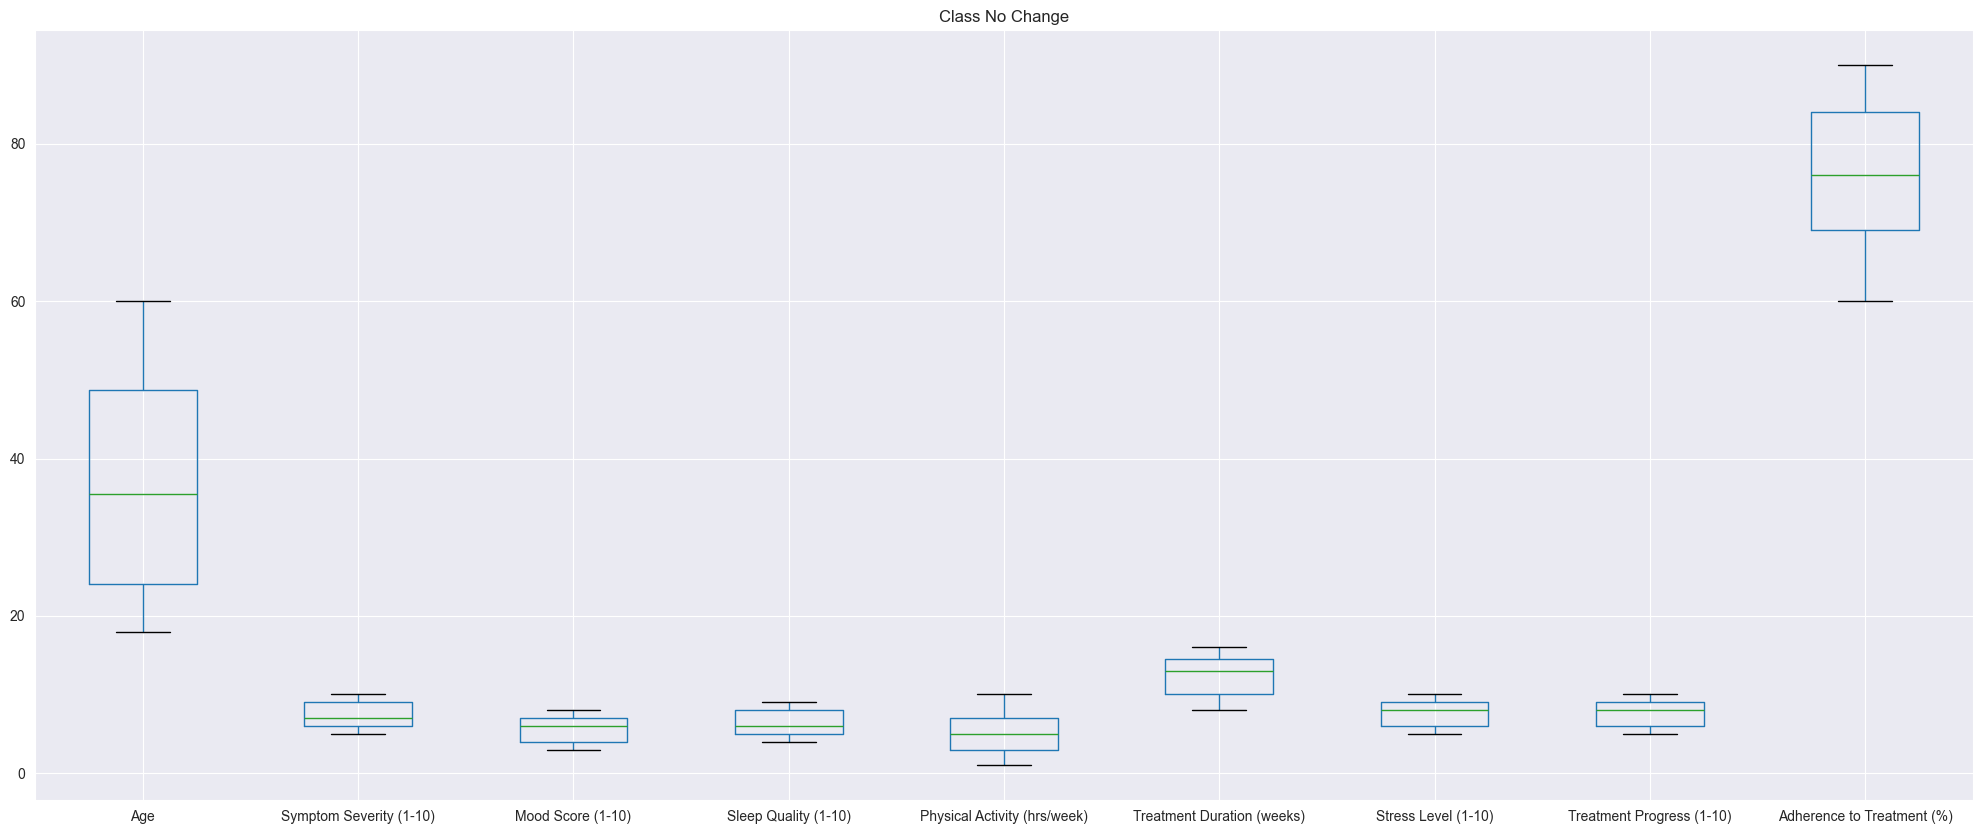

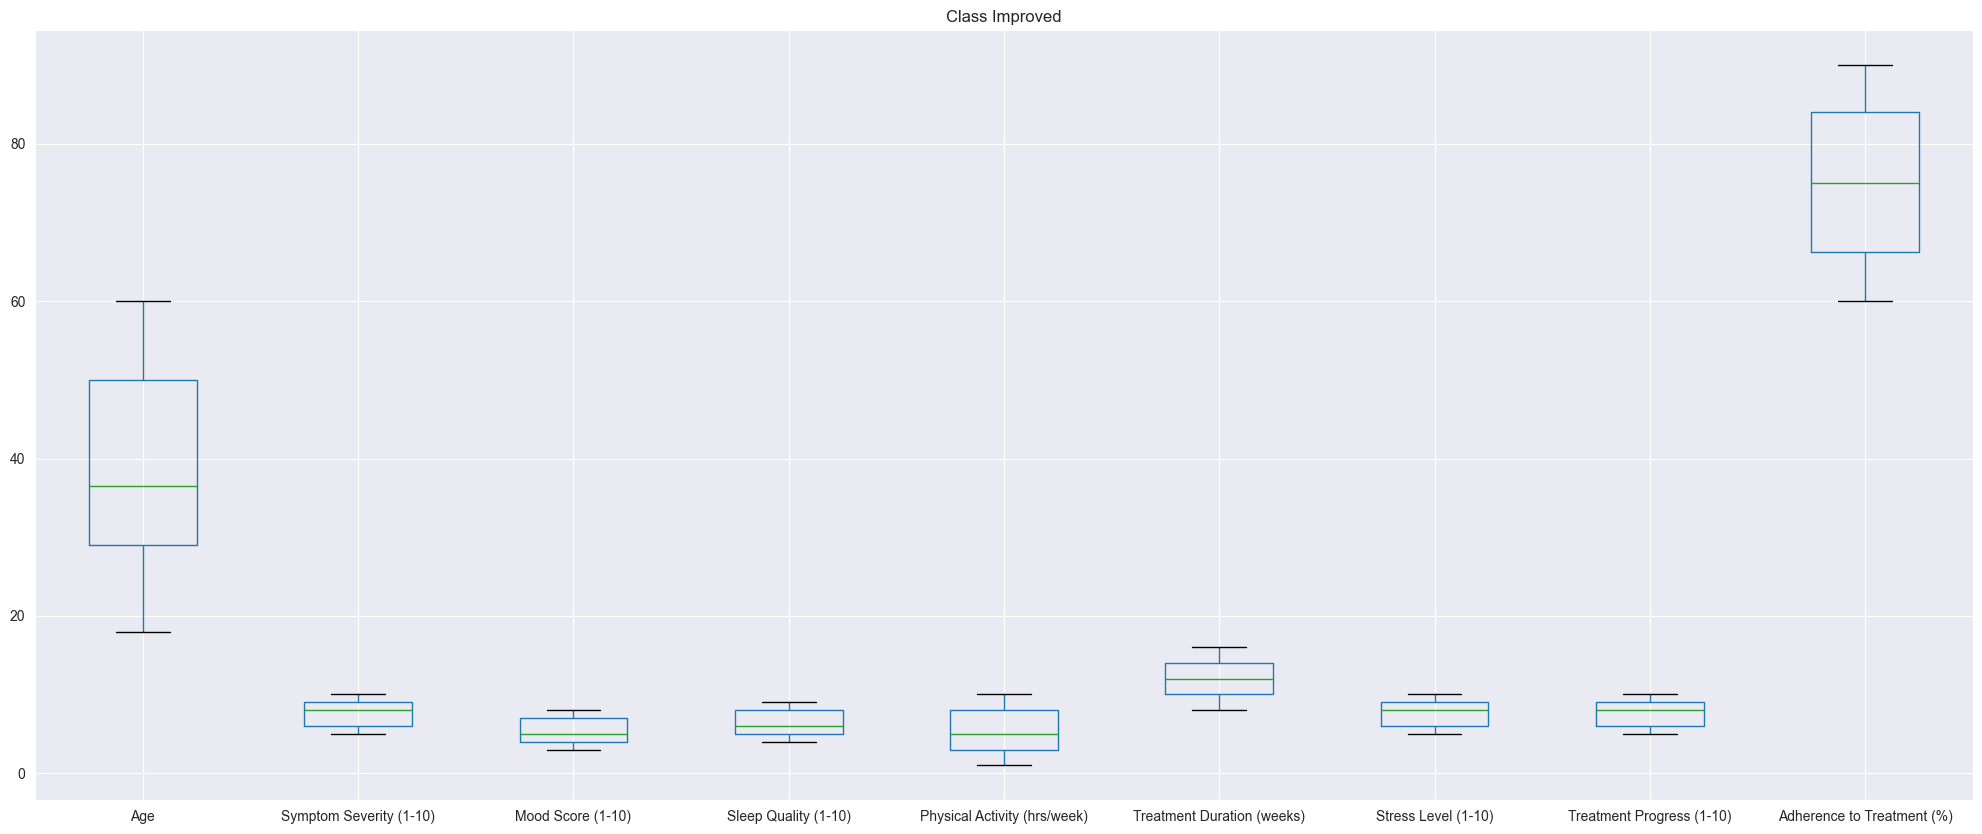

In [57]:
unique_classes = df['Outcome'].unique()
for i in unique_classes:
    plt.figure(figsize=(25,10))
    plt.title('Class {}'.format(i))
    df[df['Outcome'] == i].drop(columns='Outcome',axis=1).boxplot()
    plt.show()

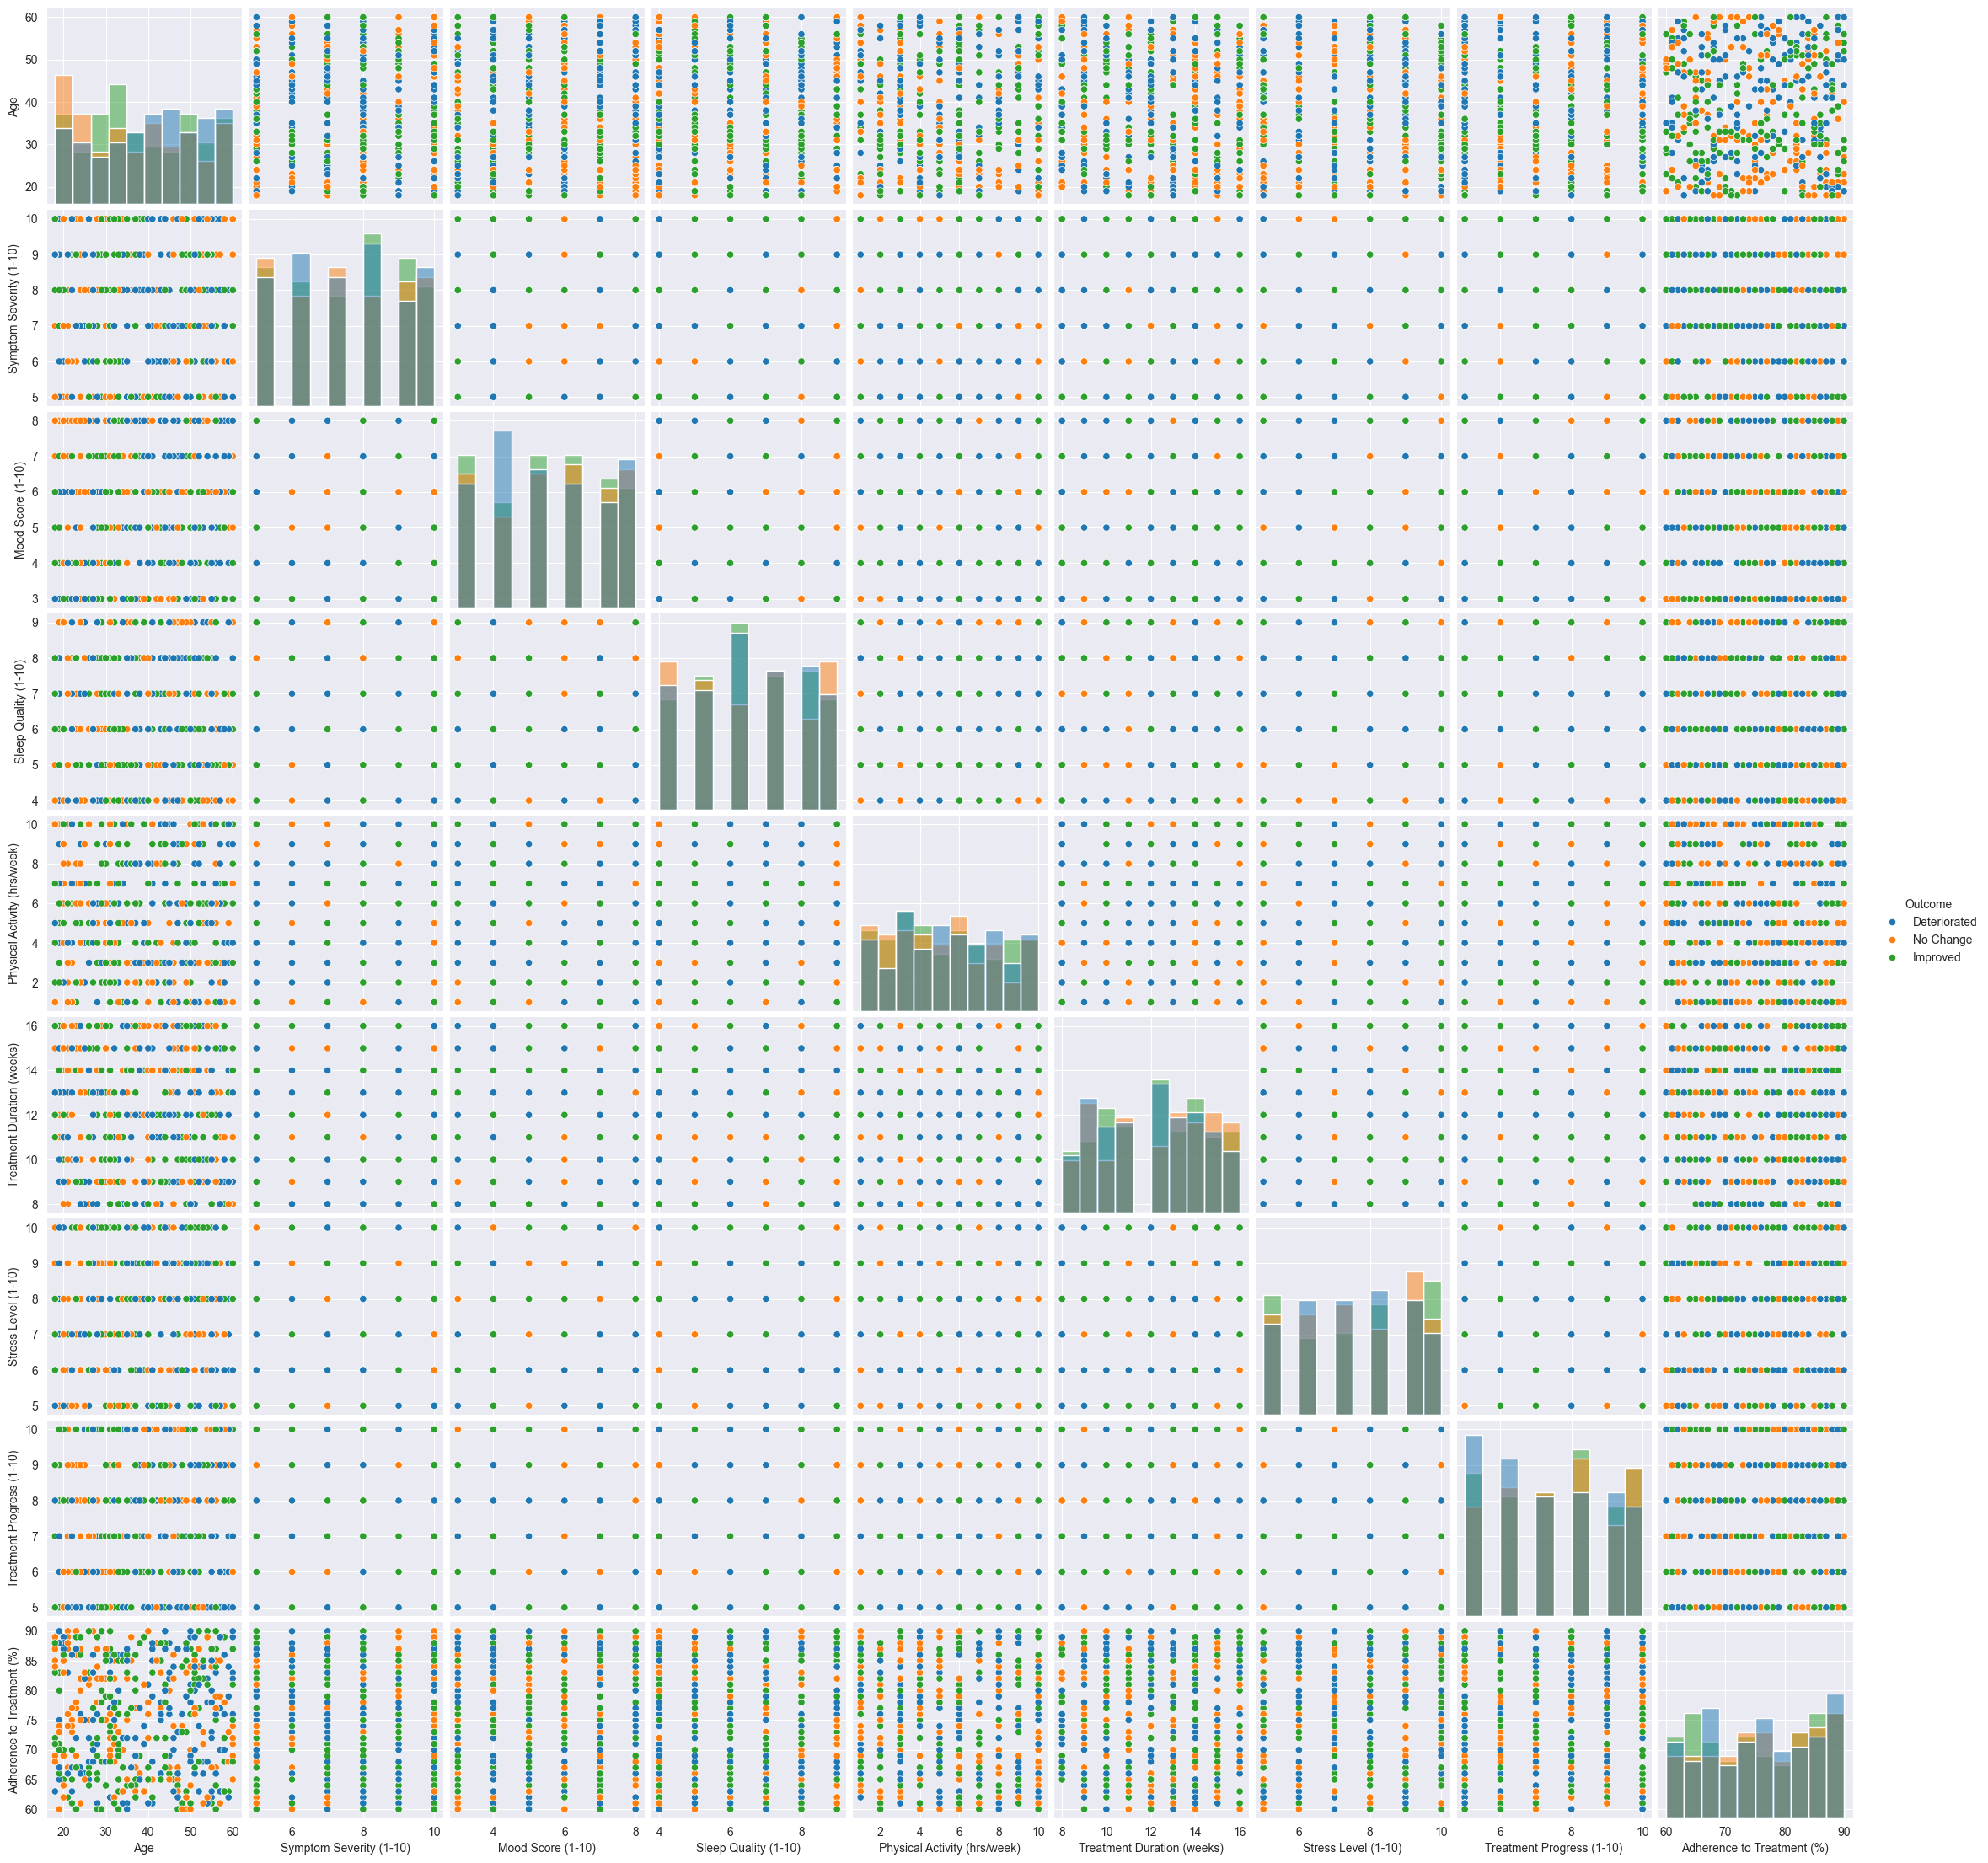

In [58]:
sns.pairplot(df,hue='Outcome',diag_kind='hist')

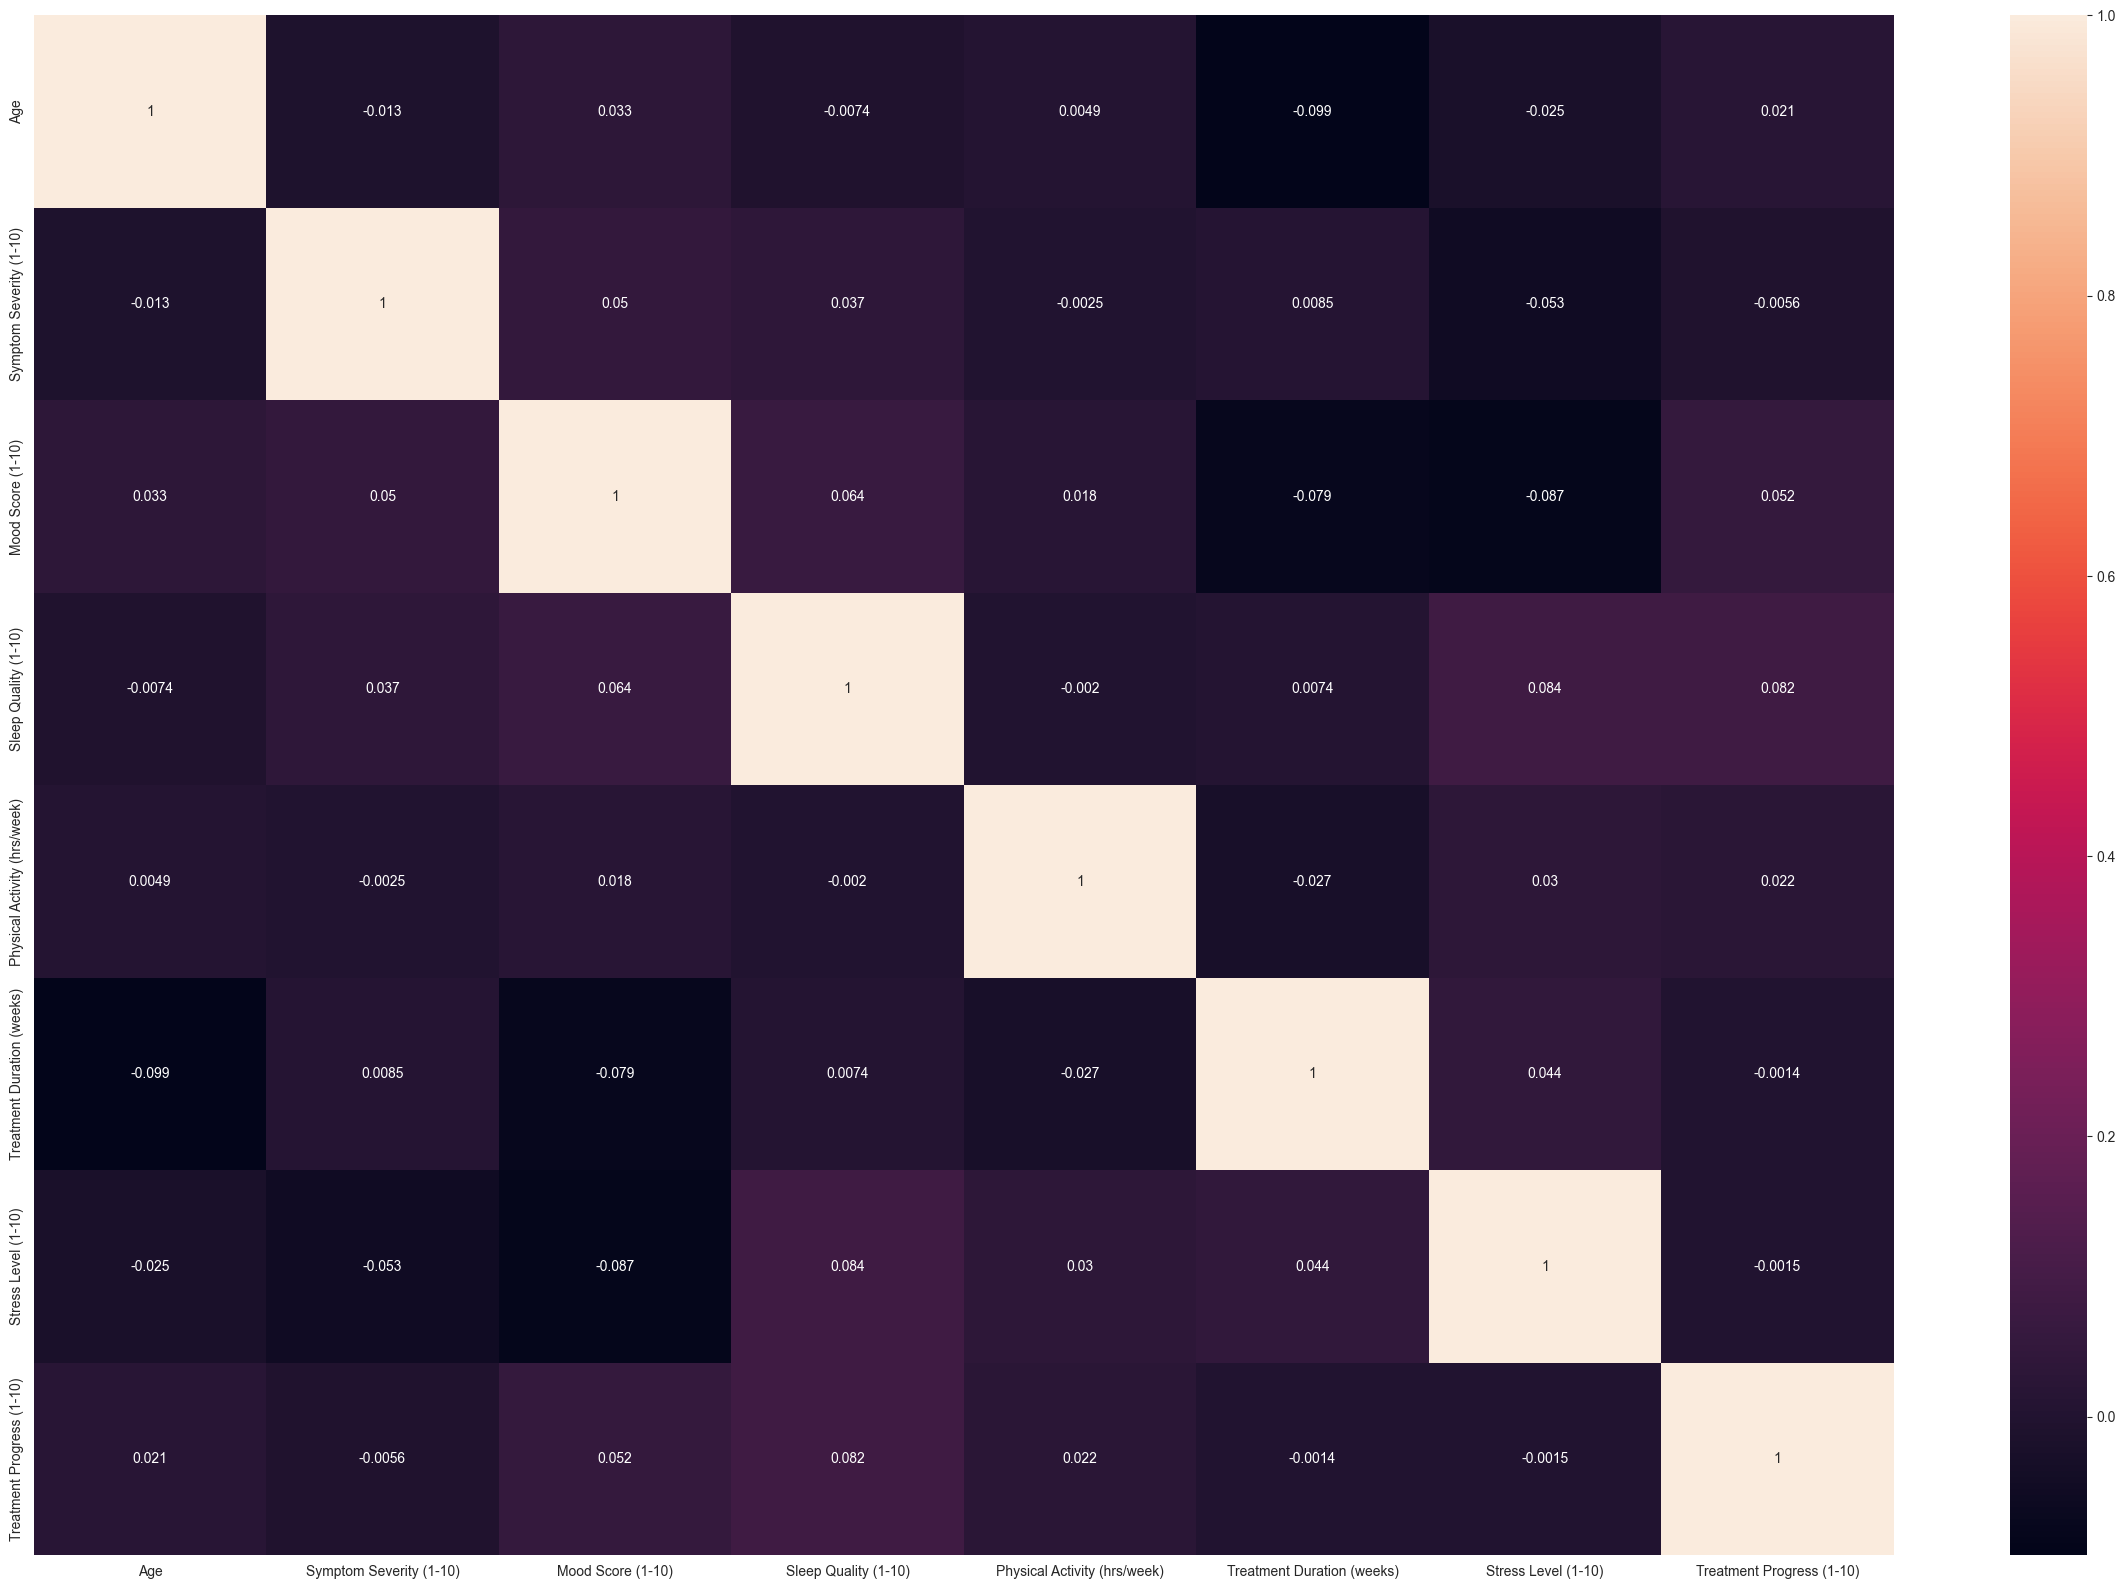

In [59]:
plt.figure(figsize=(30,20))
sns.heatmap(df[['Age','Symptom Severity (1-10)','Mood Score (1-10)','Sleep Quality (1-10)','Physical Activity (hrs/week)','Treatment Duration (weeks)','Stress Level (1-10)','Treatment Progress (1-10)']].corr(),annot=True)
plt.show()

In [60]:
def label_encoder(df:pd.DataFrame,columns:list):
    for col in columns:
        encoder = LabelEncoder()
        hasUnknown = df[col].isnull().any()
        df[col] = encoder.fit_transform(df[col].astype(str))
        if hasUnknown:
            has_unknown = encoder.transform(["nan"])[0]
            df.loc[df[col] == has_unknown, col] = np.nan
    
    return df

In [61]:
df_temp = label_encoder(df,['Gender','Diagnosis','Medication','Therapy Type','AI-Detected Emotional State','Outcome'])
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           475 non-null    float64
 1   Gender                        500 non-null    int64  
 2   Diagnosis                     500 non-null    int64  
 3   Symptom Severity (1-10)       500 non-null    int64  
 4   Mood Score (1-10)             500 non-null    int64  
 5   Sleep Quality (1-10)          500 non-null    int64  
 6   Physical Activity (hrs/week)  450 non-null    float64
 7   Medication                    500 non-null    int64  
 8   Therapy Type                  500 non-null    int64  
 9   Treatment Duration (weeks)    500 non-null    int64  
 10  Stress Level (1-10)           400 non-null    float64
 11  Outcome                       500 non-null    int64  
 12  Treatment Progress (1-10)     500 non-null    int64  
 13  AI-De

<Axes: >

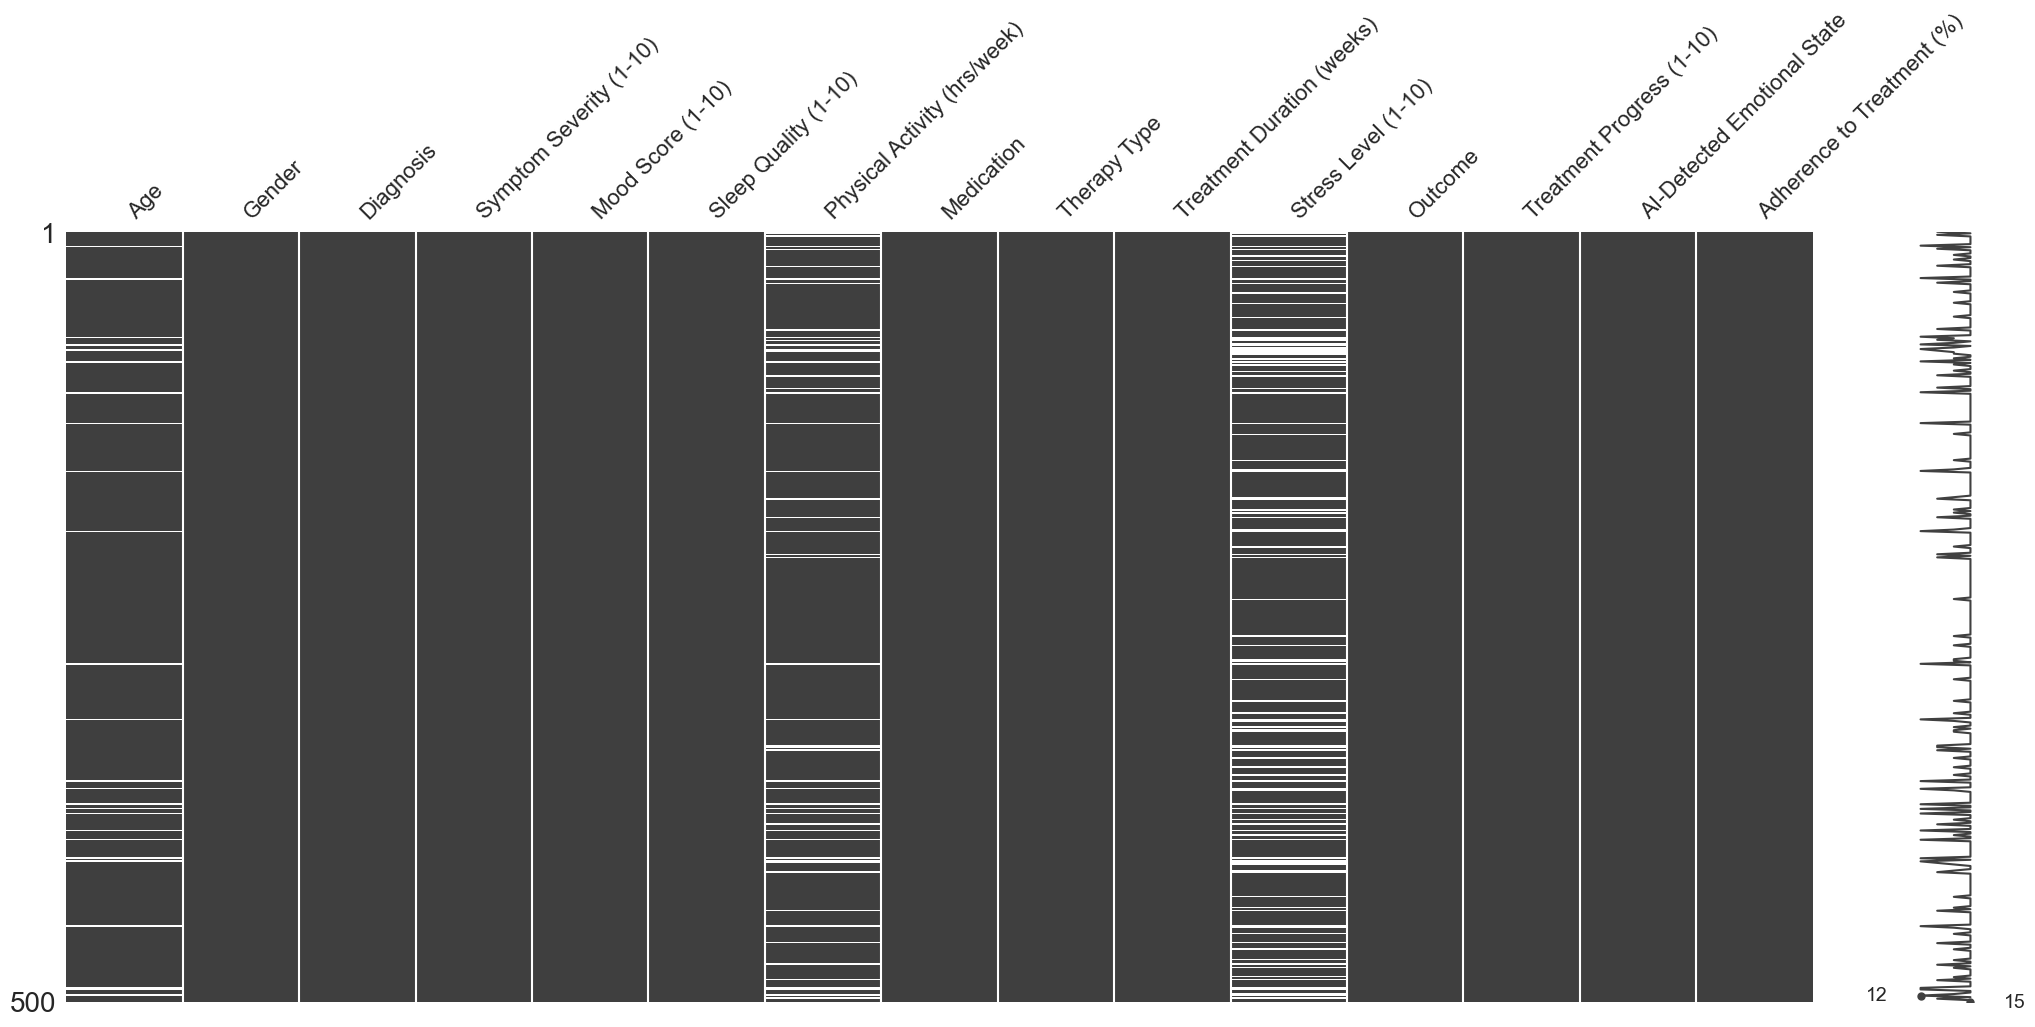

In [62]:
msno.matrix(df_temp)

<Axes: >

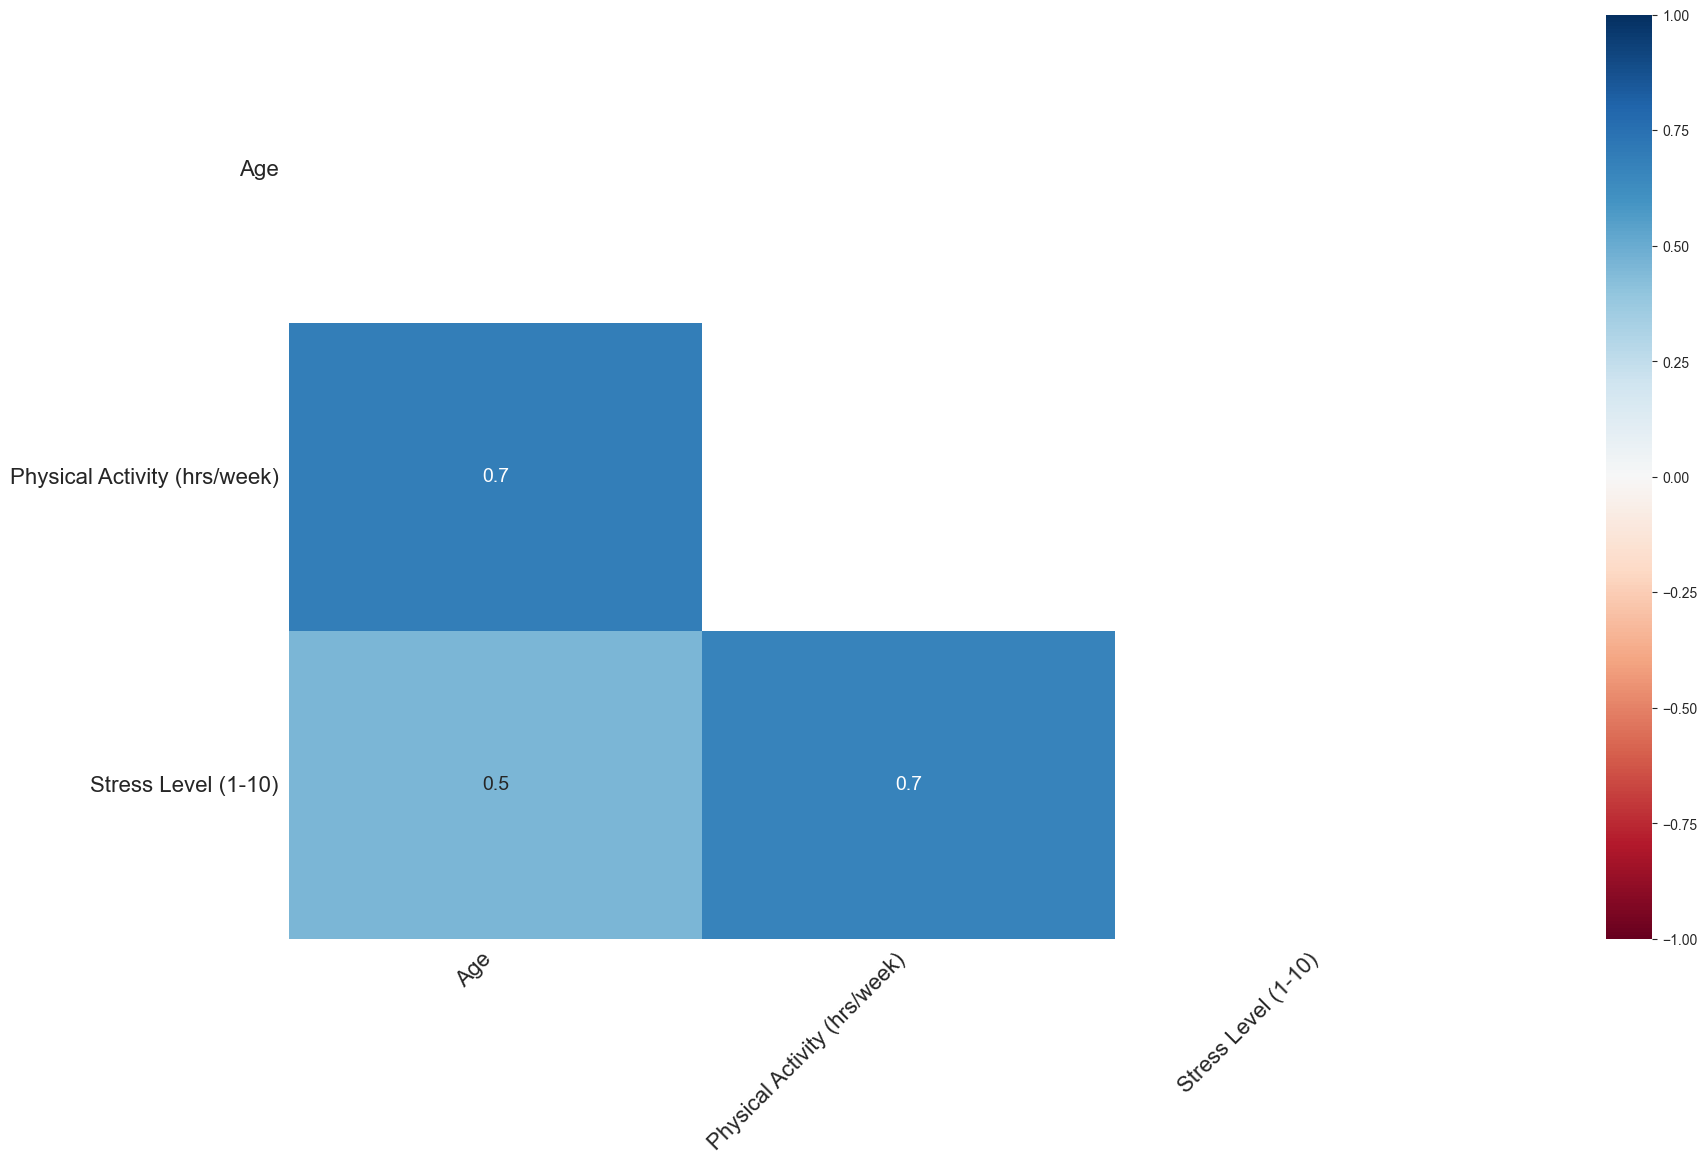

In [63]:
msno.heatmap(df_temp)

<Axes: ylabel='Frequency'>

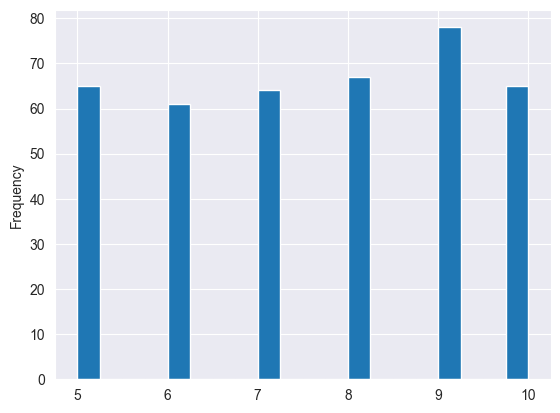

In [64]:
df_temp['Stress Level (1-10)'].plot.hist(bins=20)

In [65]:
iterative_model = IterativeImputer()
imputed_values = iterative_model.fit_transform(df_temp)
df_temp = pd.DataFrame(imputed_values,columns=df_temp.columns)
df_temp

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43.000000,0.0,2.0,10.0,5.0,8.0,5.284904,4.0,2.0,11.0,7.568860,0.0,7.0,0.0,66.0
1,40.000000,0.0,2.0,9.0,5.0,4.0,7.000000,1.0,2.0,11.0,7.000000,2.0,7.0,4.0,78.0
2,55.000000,0.0,2.0,6.0,3.0,4.0,5.288071,5.0,3.0,14.0,7.564357,0.0,5.0,3.0,62.0
3,34.000000,0.0,2.0,6.0,3.0,6.0,5.000000,5.0,3.0,8.0,8.000000,0.0,10.0,2.0,72.0
4,52.000000,1.0,3.0,7.0,6.0,6.0,8.000000,2.0,2.0,12.0,5.000000,0.0,6.0,2.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,38.627857,1.0,1.0,10.0,4.0,8.0,5.279102,4.0,1.0,8.0,7.568043,1.0,10.0,1.0,73.0
496,22.000000,1.0,3.0,5.0,6.0,6.0,7.000000,3.0,3.0,13.0,6.000000,0.0,8.0,3.0,86.0
497,23.000000,1.0,2.0,7.0,3.0,4.0,5.263406,0.0,0.0,10.0,7.570847,0.0,5.0,4.0,87.0
498,48.000000,1.0,0.0,9.0,4.0,6.0,9.000000,0.0,3.0,10.0,6.000000,1.0,7.0,0.0,73.0


In [66]:
def function1(val):
    return np.ceil(val)

In [67]:
df_temp['Stress Level (1-10)'] = df_temp['Stress Level (1-10)'].apply(function1)
df_temp

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43.000000,0.0,2.0,10.0,5.0,8.0,5.284904,4.0,2.0,11.0,8.0,0.0,7.0,0.0,66.0
1,40.000000,0.0,2.0,9.0,5.0,4.0,7.000000,1.0,2.0,11.0,7.0,2.0,7.0,4.0,78.0
2,55.000000,0.0,2.0,6.0,3.0,4.0,5.288071,5.0,3.0,14.0,8.0,0.0,5.0,3.0,62.0
3,34.000000,0.0,2.0,6.0,3.0,6.0,5.000000,5.0,3.0,8.0,8.0,0.0,10.0,2.0,72.0
4,52.000000,1.0,3.0,7.0,6.0,6.0,8.000000,2.0,2.0,12.0,5.0,0.0,6.0,2.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,38.627857,1.0,1.0,10.0,4.0,8.0,5.279102,4.0,1.0,8.0,8.0,1.0,10.0,1.0,73.0
496,22.000000,1.0,3.0,5.0,6.0,6.0,7.000000,3.0,3.0,13.0,6.0,0.0,8.0,3.0,86.0
497,23.000000,1.0,2.0,7.0,3.0,4.0,5.263406,0.0,0.0,10.0,8.0,0.0,5.0,4.0,87.0
498,48.000000,1.0,0.0,9.0,4.0,6.0,9.000000,0.0,3.0,10.0,6.0,1.0,7.0,0.0,73.0


In [68]:
df_temp['Age'] = df_temp['Age'].apply(function1)

In [69]:
df_temp['Physical Activity (hrs/week)'] = df_temp['Physical Activity (hrs/week)'].apply(function1)

In [70]:
df_temp.isnull().sum()

Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

## Train Model

In [72]:
X,y = df_temp.drop(columns='Outcome',axis=1),df_temp['Outcome']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Logistic Regression

In [74]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
print(f'Model coeficient {model.coef_}')

Model coeficient [[ 0.01161406  0.02171067  0.02321452 -0.00044879 -0.01783557  0.04164873
   0.02659915 -0.08327481  0.06001004 -0.02018097 -0.03762047 -0.07653822
  -0.01885352 -0.00375684]
 [ 0.00061635  0.13220703 -0.02947452  0.02033675 -0.03967118  0.01308206
   0.0053634   0.02756653 -0.04714981 -0.025646    0.03255012  0.04856524
   0.07102627 -0.00286604]
 [-0.01223042 -0.15391771  0.00625999 -0.01988795  0.05750675 -0.05473079
  -0.03196255  0.05570828 -0.01286023  0.04582697  0.00507035  0.02797297
  -0.05217274  0.00662288]]


In [75]:
pred = model.predict(X_test)
print('Classification Report')
print(classification_report(y_test,pred,zero_division=0))

Classification Report
              precision    recall  f1-score   support

         0.0       0.50      0.54      0.52        37
         1.0       0.48      0.38      0.42        37
         2.0       0.23      0.27      0.25        26

    accuracy                           0.41       100
   macro avg       0.40      0.40      0.40       100
weighted avg       0.42      0.41      0.41       100



## KNN classification

In [76]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print('Classification Report')
print(classification_report(y_test,pred,zero_division=0))

Classification Report
              precision    recall  f1-score   support

         0.0       0.40      0.68      0.50        37
         1.0       0.38      0.22      0.28        37
         2.0       0.25      0.15      0.19        26

    accuracy                           0.37       100
   macro avg       0.34      0.35      0.32       100
weighted avg       0.35      0.37      0.34       100



## Bayes classification

In [77]:
model = GaussianNB()
model.fit(X_train,y_train)
print(f'Model coeficient {model.class_prior_}')
pred = model.predict(X_test)
print('Classification report')
print(classification_report(y_test,pred,zero_division=0))

Model coeficient [0.335  0.3325 0.3325]
Classification report
              precision    recall  f1-score   support

         0.0       0.45      0.65      0.53        37
         1.0       0.55      0.30      0.39        37
         2.0       0.26      0.27      0.26        26

    accuracy                           0.42       100
   macro avg       0.42      0.41      0.39       100
weighted avg       0.44      0.42      0.41       100

